# Amazon Product Recommendation

### This capstone project aims to build a product recommendation system in a model-based collaborative filtering approach using different machine learning models and comparing the results between them.

# Business Understanding

### By the start of 2020, the amount of data available on the internet was estimated to be 44 zettabytes of data. With this huge of a database and more than 4.8 billion users on the internet, accurate and relevant search and recommendation of products is an ever increasing need to keep user engagement and bring the best results in accordance to the factors which are important to the user. This can vary with demographics, psychographics, search habits, and other such variables.

### This is especially relevant to large tech companies like Amazon, Netflix, Alibaba and other online platforms which offer a wide variety of products to the audience. They need personalized results to the individual user or more commonly called a recommendation system which filters and displays other products that the user may be interested in to increase basket ratio in the case of Amazon and Alibaba or increase viewing times in the case of Netflix.

In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
sns.set_theme()

# Data Understanding

### The data used is Amazon Product Reviews which contains 7,824,482 rows and ratings for 476,002 different products made by 4,201,696 different users. The 4 columns are "User ID", "Product ID", "Rating", and "Time Stamp".

### This datset is the courtesy of:
### Justifying recommendations using distantly-labeled reviews and fined-grained aspects
### Jianmo Ni, Jiacheng Li, Julian McAuley
### Empirical Methods in Natural Language Processing (EMNLP), 2019

In [2]:
#Importing Data

df = pd.read_csv('Datasets/Amazon Reviews.csv', names = ['User ID','Product ID','Rating','Time Stamp'], nrows = 100000)
df['Time Stamp'] = df['Time Stamp'].apply(lambda x:datetime.fromtimestamp(x))
df = df.rename(columns={'Time Stamp':'Date'})
df.head()

,User ID,Product ID,Rating,Date
0,AKM1MP6P0OYPR,0132793040,5.0,2013-04-13 04:00:00
1,A2CX7LUOHB2NDG,0321732944,5.0,2012-07-01 04:00:00
2,A2NWSAGRHCP8N5,0439886341,1.0,2013-04-29 04:00:00
3,A2WNBOD3WNDNKT,0439886341,3.0,2013-07-22 04:00:00
4,A1GI0U4ZRJA8WN,0439886341,1.0,2012-04-18 04:00:00


In [3]:
df['Date'].dt.hour.value_counts()

4    100000
Name: Date, dtype: int64

### Since the time part of the time stamp is all at the same exact time we can omit it from the column

In [4]:
df['Date'] = df['Date'].dt.date
df['Date'] = pd.to_datetime(df['Date'], format = "%Y-%m-%d")
df.head()

,User ID,Product ID,Rating,Date
0,AKM1MP6P0OYPR,0132793040,5.0,2013-04-13
1,A2CX7LUOHB2NDG,0321732944,5.0,2012-07-01
2,A2NWSAGRHCP8N5,0439886341,1.0,2013-04-29
3,A2WNBOD3WNDNKT,0439886341,3.0,2013-07-22
4,A1GI0U4ZRJA8WN,0439886341,1.0,2012-04-18


## Data Exploration

In [5]:
print('Rows     :',df.shape[0])
print('Columns  :',df.shape[1])
print('\nNumber of Different Users: ', df['User ID'].nunique())
print('\nNumber of Different Products: ', df['Product ID'].nunique())
print('\nFeatures :\n     :',df.columns.tolist())
print('\nMissing values    :',df.isnull().values.sum())
print('\nUnique values :\n',df.nunique())
print('\nMissing values in columns:\n',df.isnull().sum())
print('\nDuplicated rows: \n',df.duplicated().value_counts())
print('\nData Types of each column: \n', df.dtypes)

Rows     : 100000
Columns  : 4

Number of Different Users:  89938

Number of Different Products:  6918

Features :
     : ['User ID', 'Product ID', 'Rating', 'Date']

Missing values    : 0

Unique values :
 User ID       89938
Product ID     6918
Rating            5
Date           5477
dtype: int64

Missing values in columns:
 User ID       0
Product ID    0
Rating        0
Date          0
dtype: int64

Duplicated rows: 
 False    100000
dtype: int64

Data Types of each column: 
 User ID               object
Product ID            object
Rating               float64
Date          datetime64[ns]
dtype: object


## Data Visualization

## 1. Total Number of Each Rating

### Below we can see how many times each rating was given. A very large number of products received a 5 star review and next was the 4 star. So it seems that users who have rated products were generally happy with the products they received and very few in comparison left users unsatisfied.

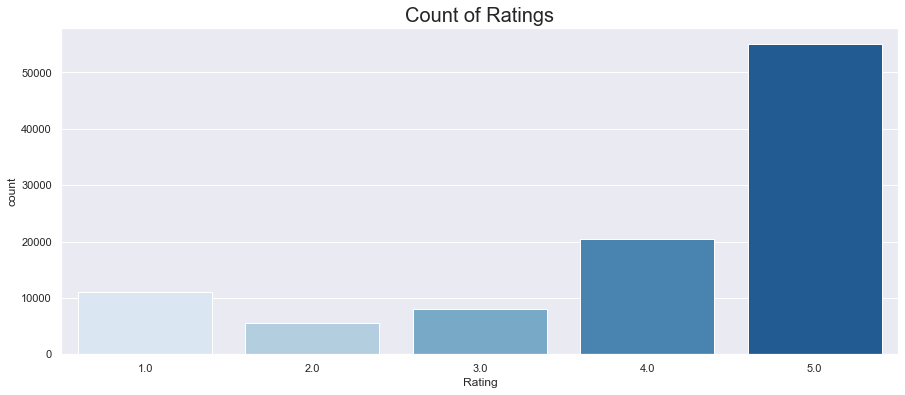

In [6]:
plt.figure(figsize=(15,6))
sns.countplot(data = df, x = 'Rating', palette = 'Blues')
plt.title('Count of Ratings',fontdict={'fontsize':20});

## 2. Total Number of Ratings per User
### Here we observe the number of ratings given by each user. It seems that up until the 75th percentile of users only gave a single rating to products and the maximum rating given by a single user was 103.

In [7]:
df.groupby('User ID').count().describe()

,Product ID,Rating,Date
count,89938.000000,89938.000000,89938.000000
mean,1.111877,1.111877,1.111877
std,0.740622,0.740622,0.740622
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000
max,103.000000,103.000000,103.000000


## 3. Percentage of Number of Ratings Given
### We have seen that most products received either a 5 star or 4 star review. But out of all products reveiwed, what do the percentages of these look like? How many received a 5 star review out of the total number of products reveiwed.

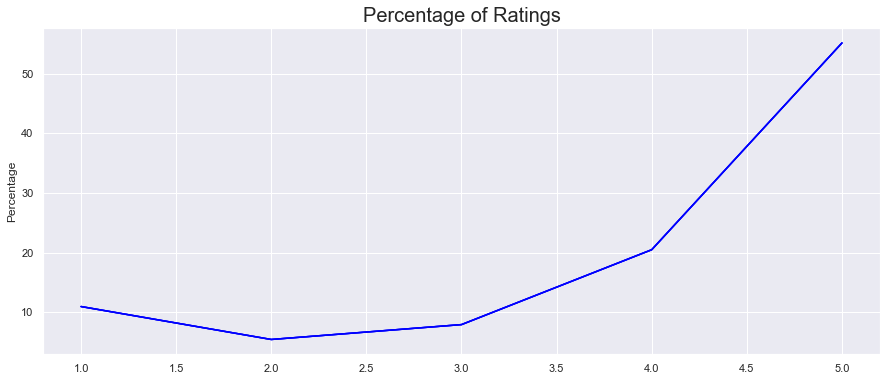

In [8]:
plt.figure(figsize=(15,6))
plt.plot((df.groupby('Rating').count()/df.shape[0])*100, color='blue')
plt.title('Percentage of Ratings', fontdict={'fontsize':20})
plt.ylabel('Percentage');

### It seems that more than 50% of products received a 5 star review and another 20% received a 4 star review. We can now accurately conclude that atleast 70% of the products reviewed were of high quality, or at least left the user satisfied.

### Let's look at the ratings in more depth. Let's see the number of times a product was rated and then the average rating given to these products.

In [9]:
df.groupby('Product ID')['Rating'].count().sort_values(ascending=False)

Product ID
B00004ZCJE    2547
B00001P4ZH    2075
B00004T8R2    1692
B00001WRSJ    1586
0972683275    1051
              ... 
B00004Z7KM       1
9985728513       1
9985727827       1
B00004Z7N5       1
0132793040       1
Name: Rating, Length: 6918, dtype: int64

### Since the maximum number of times any given product was rated is 2547. A bin size of 50 would be fair which will give us 50 items in each bar of the histogram we will plot

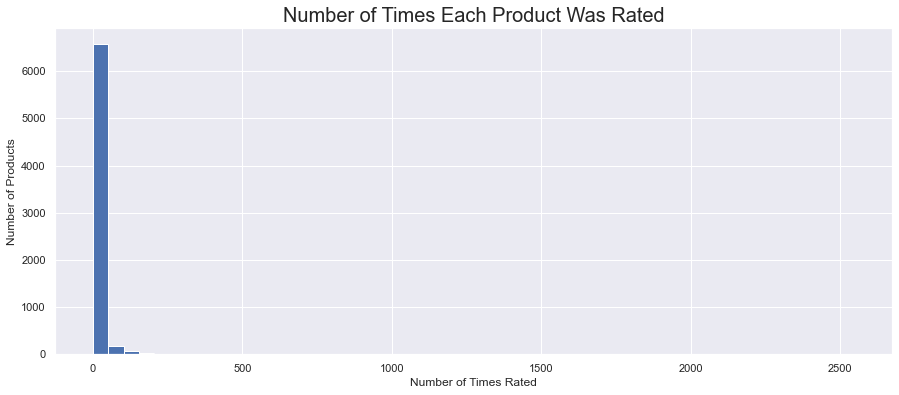

In [10]:
plt.figure(figsize=(15,6))
df.groupby('Product ID')['Rating'].count().hist(bins=50)
plt.title('Number of Times Each Product Was Rated', fontdict={'fontsize':'20'})
plt.xlabel('Number of Times Rated')
plt.ylabel('Number of Products');

### The above histogram shows that an absurd amount of products were rated less than 50 times. To cater for this skewness, let's only consider getting average rating of products which are rated more than 50 times.

In [11]:
# Only including those users which gave more than 50 readings
new_df = df.groupby('Product ID').filter(lambda x:x['Rating'].count() >= 50)

In [12]:
new_df_rating_count = pd.DataFrame(new_df.groupby('Product ID')['Rating'].mean())
new_df_rating_count['Count'] = new_df.groupby('Product ID')['Rating'].count()
new_df_rating_count

,Rating,Count
Product ID,,
0972683275,4.470980,1051
1400501466,3.560000,250
1400501520,4.243902,82
1400501776,3.884892,139
1400532620,3.684211,171
...,...,...
B00005BMSN,4.322709,251
B00005I9RU,3.899441,179
B00005JAD8,4.011628,86


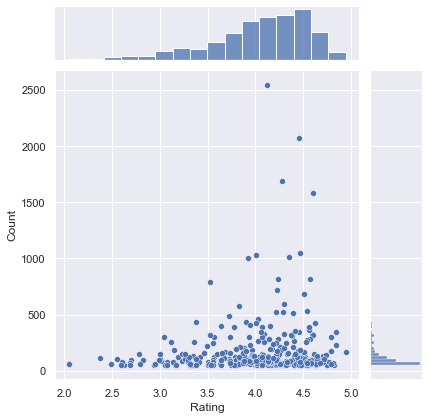

In [13]:
sns.jointplot('Rating','Count',data=new_df_rating_count);

### This figure represents the average rating given to a product (which was reviewed at least 50 times or more) and the number of times it was rated. If we split the graph into 4 equal hypothetical quartiles, the top right quartile will represent the highest quality products and the lower left quartile will represent the lowest quality products.

In [14]:
df.groupby('Product ID')['Rating'].mean().sort_values(ascending=False).reset_index(name='Mean Rating')

,Product ID,Mean Rating
0,0132793040,5.0
1,B00004Z5PR,5.0
2,B00000J0KX,5.0
3,B00004Z5QV,5.0
4,B00004Z5RG,5.0
...,...,...
6913,B00000J46I,1.0
6914,B00004Y2Y6,1.0
6915,B00004Y2X5,1.0
6916,B00004Y2VZ,1.0


## Time Series Visualizations

1. How the number of orders changed throughout time
2. What time of the year is busiest
3. How correlated are the number of orders with holidays
4. How many products are ordered throughout the week. Are there higher numbers during weekends than weekdays?
5. For ease of visualizations take time for only the past decade.
6. Examine peaks in 2013 and 2014

In [15]:
#Set the time stamp as the index
df.reset_index(drop=True,inplace=True)
df.sort_values('Date', ascending=True,inplace=True)
df.set_index('Date',inplace=True)
df.head()

,User ID,Product ID,Rating
Date,,,
1998-12-04,A2ZUNCI13N2OUL,B00000DM9D,4.0
1998-12-07,A28AXJL31RXUON,B00000DM9M,4.0
1998-12-18,AFHLJPG5ZIMNO,B00000DM96,5.0
1998-12-26,AY2NE9ZEZ5LCE,B00000DM9D,5.0
1999-05-02,A2LG0LV5RI86F0,B00000DM93,5.0


### For ease of visualizations lets take orders from 2006 onwards

In [16]:
df_timeseries = df.loc['2006-01-01':]
df_timeseries

,User ID,Product ID,Rating
Date,,,
2006-01-01,A1S7LXQEXMJLBP,B00001P4XA,3.0
2006-01-01,A2V7EO331SFUF6,B00000K4KH,5.0
2006-01-01,A17JQIGHZCK73L,B00004Y2ZF,4.0
2006-01-01,A2DL5VAZ2F9CU6,B00000J0D8,2.0
2006-01-01,A14C44S6ETSY1N,B00004ZCKV,5.0
...,...,...,...
2014-07-22,A2WFKCI27CHOXX,9486350493,5.0
2014-07-22,A2M4BWBQZOPCIU,B00001QEMF,1.0
2014-07-22,A2YI83UP0RTEX9,B00004WCGF,5.0


### We can already begin to see that there are gaps in the dates. We do not have data for all days of the months.

## 1. How the number of orders have changed throughout the years

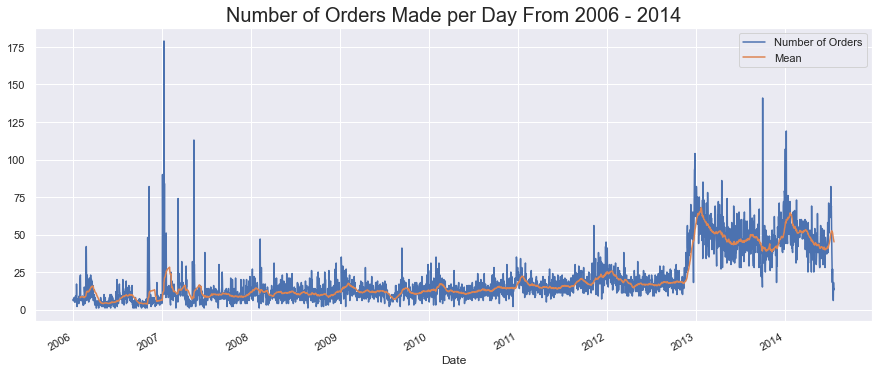

In [17]:
df_timeseries.groupby('Date')['User ID'].count()
plt.figure(figsize=(15,6))
plt.plot(df_timeseries.groupby('Date')['User ID'].count())
df_timeseries.groupby('Date')['User ID'].count().rolling(window=30).mean().plot()
plt.title('Number of Orders Made per Day From 2006 - 2014', fontdict={'fontsize':20})
plt.legend(['Number of Orders','Mean']);

### The number of daily orders have remained fairly consistent through the beginning of the 21st century and saw an exponential increase in 2013 after which it kept seeing a spike at the beginning of the year.

In [18]:
#Creating month and year column
df_timeseries['Month'] = df_timeseries.index.month
df_timeseries['Year'] = df_timeseries.index.year

### 4. How many products are ordered throughout the week. Are there a higher number of orders on the weekends?
### For ease, we will only consider this for the year 2013. The below graph looks at the daily number of orders throughout the year

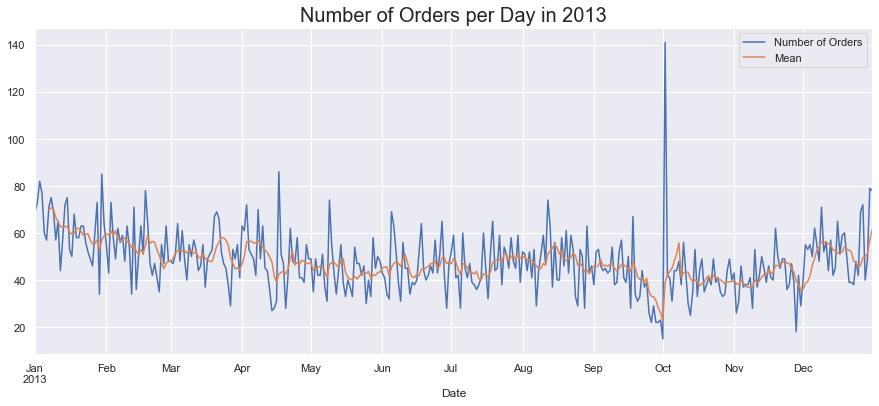

In [19]:
# Grabbing values for only 2013
df_timeseries_2013 = df_timeseries[df_timeseries.index.year == 2013]

plt.figure(figsize=(15,6))
df_timeseries_2013.groupby('Date')['User ID'].count().plot()
df_timeseries_2013.groupby('Date')['User ID'].count().rolling(window=7).mean().plot()
plt.title('Number of Orders per Day in 2013', fontdict={'fontsize':20})
plt.legend(['Number of Orders','Mean']);

### Looking at the 2013 data, we can confirm the highest mean number of orders we get is around January and December. There seems to be a peak in October but that can be just taken as an outlier.
### Now lets break this down to a weekly level and see how it looks for each month

    Month  Day of Week Day of Week Name  User ID  Product ID  Rating  Year
0       1            0              Mon      279         279     279   279
1       1            1              Tue      316         316     316   316
2       1            2              Wed      336         336     336   336
3       1            3            Thurs      305         305     305   305
4       1            4              Fri      259         259     259   259
..    ...          ...              ...      ...         ...     ...   ...
79     12            2              Wed      212         212     212   212
80     12            3            Thurs      223         223     223   223
81     12            4              Fri      241         241     241   241
82     12            5              Sat      176         176     176   176
83     12            6              Sun      221         221     221   221

[84 rows x 7 columns]


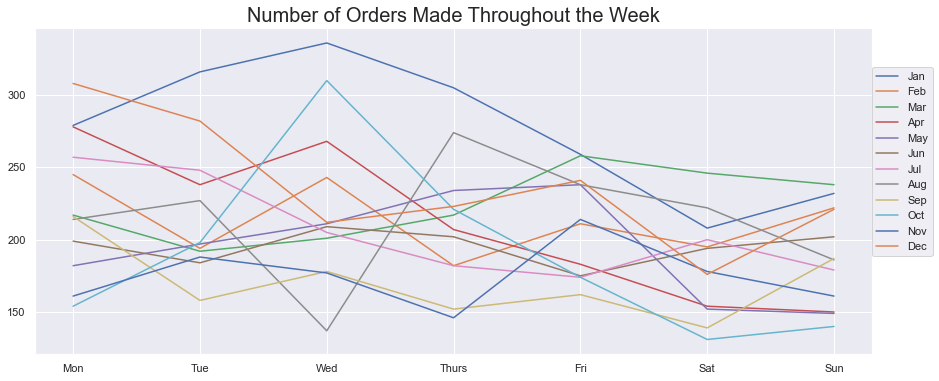

In [20]:
# Getting day of week
df_timeseries_2013['Day of Week'] = df_timeseries_2013.index.weekday
df_timeseries_2013['Day of Week Name'] = df_timeseries_2013['Day of Week']

# Converting day of week numbers to names
df_timeseries_2013['Day of Week Name'] = df_timeseries_2013['Day of Week Name'].replace([0,1,2,3,4,5,6], ['Mon','Tue','Wed','Thurs','Fri','Sat','Sun'])

# Grouping to get the number of orders in a week per month of 2013
df_timeseries_2013_grouped = df_timeseries_2013.groupby(['Month','Day of Week','Day of Week Name']).count().reset_index()
df_timeseries_2013_grouped = df_timeseries_2013_grouped.sort_index(level='Day of Week')
print(df_timeseries_2013_grouped)

#Plotting number of orders in a week for 2013
plt.figure(figsize=(15,6))
for i in df_timeseries_2013_grouped['Month'].unique():
    plt.plot('User ID', data = df_timeseries_2013_grouped[df_timeseries_2013_grouped['Month'] == i].set_index('Day of Week Name'))

plt.title('Number of Orders Made Throughout the Week', fontdict={'fontsize':20})
plt.legend(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], loc=(1,0.3));

### January far exceeds all other months in terms of number of orders made. Although this further confirms the trend we saw in the figure before it, this does not give us much insight into the number of sales per week. We can assume that there is weak correlation if at all between the number of orders and the weekend.

# Model 1: Association Rule Mining using the Apriori Algorithm - Remove?

### The first model we will be using is Association Rule Mining using the Apriori Algorithm. Association Rule Mining is a branch of machine learning which will generate rules which we can use to determine what products are usually bought together. For example, a very common trend a grocery store may see is that eggs, milk, and bread are usually bought together. So if a customer buys milk and eggs, there is a high chance of them buying bread as well. These sorts of rules can be used to place more commonly bought items near each other to increase the chance of customers buying them and thus leading to increased sales.

### The Apriori Algorithm is used for frequent item set mining and association rule learning. It takes something called a bottom-up approach where it specifies the minimum occurance of an item to be considered. If the item does not occur more than the set threshold in a dataset, it is discarded. This eliminats a plathora of rules which the algorithm must generate before it starts processing the data. There are 3 metrics to consider when using the Apriori Algorithm

### 1. **Suppport**: This is how often an item set (A pair or more of products) appear together or are bought together. Suppose the following order:

In [21]:
print('Order 1: Apple, Egg, Milk')
print('Order 2: Carrot, Milk')
print('Order 3: Apple, Egg, Carrot')
print('Order 4: Apple, Egg')
print('Order 5: Apple, Carrot')
print('\nSupport{Apple,Egg} = 3/5 or 60%')

Order 1: Apple, Egg, Milk
Order 2: Carrot, Milk
Order 3: Apple, Egg, Carrot
Order 4: Apple, Egg
Order 5: Apple, Carrot

Support{Apple,Egg} = 3/5 or 60%


### 2. **Confidence**: Given two items A and B. Confidence gives us a percentage of how often item B was bought when item A was bought and vice versa. In other words it tells us how often a given rule is true for all orders.
### Eg.
### confidence{A->B} = support{A,B} / support{A} gives how often product B was purchased if product A was purchased

### 3. **Lift**: Given two items, A and B, lift indicates whether there is a relationship between A and B, or whether the two items are occuring together in the same orders simply by chance (ie: at random). Unlike the confidence metric whose value may vary depending on direction (eg: confidence{A->B} may be different from confidence{B->A}), lift has no direction. This means that the lift{A,B} is always equal to the lift{B,A}

# Normal Predictor

In [78]:
#Importing Libraries
from surprise import SVD
from surprise import SlopeOne
from surprise import KNNWithMeans
from surprise import NormalPredictor
from surprise import accuracy
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import KFold
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV

In [77]:
#Showing a preview of the data frame
data = df.reset_index(drop=True)
data.head()

,User ID,Product ID,Rating
0,A2ZUNCI13N2OUL,B00000DM9D,4.0
1,A28AXJL31RXUON,B00000DM9M,4.0
2,AFHLJPG5ZIMNO,B00000DM96,5.0
3,AY2NE9ZEZ5LCE,B00000DM9D,5.0
4,A2LG0LV5RI86F0,B00000DM93,5.0


In [76]:
#Reading and preparing the data
data = df.reset_index(drop=True)
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(data,reader)

#Running K Fold Cross Validation
cross_validate(NormalPredictor(), data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm NormalPredictor on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.7346  1.7397  1.7311  1.7390  1.7290  1.7347  0.0042  
MAE (testset)     1.3252  1.3307  1.3274  1.3274  1.3226  1.3267  0.0027  
Fit time          0.13    0.17    0.17    0.18    0.18    0.16    0.02    
Test time         0.21    0.20    0.18    0.38    0.22    0.24    0.07    


{'test_rmse': array([1.73462433, 1.73970582, 1.73112959, 1.73902722, 1.7289739 ]),
 'test_mae': array([1.3252152 , 1.33065496, 1.32740217, 1.32743756, 1.32256817]),
 'fit_time': (0.12633562088012695,
  0.16790342330932617,
  0.16892361640930176,
  0.1750788688659668,
  0.17689847946166992),
 'test_time': (0.2136070728302002,
  0.1970679759979248,
  0.18489289283752441,
  0.3827781677246094,
  0.22187089920043945)}

# Singular Value Decomposition

In [50]:
#Reading and preparing the data
data = df.reset_index(drop=True)
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(data,reader)
raw_ratings = data.raw_ratings

#Saving 2 different sets of data for un-biased accuracy estimations
threshold = int(0.9 * len(raw_ratings))
raw_ratings_A = raw_ratings[:threshold]
raw_ratings_B = raw_ratings[threshold:]
data.raw_ratings = raw_ratings_A

#Selecting the best parameters using grid search
param_grid = {'n_epochs':[5,10,15,20,25,30],'lr_all':[0.002,0.003,0.004,0.005,0.006,0.007]}   #Try ranging n_epochs from 20 to 30 by 1 and lr_all from 0.006 to 0.010
grid_search = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5)
grid_search.fit(data)
print('Best parameters: ', grid_search.best_params)

algo = grid_search.best_estimator['rmse']    #Creates an algorithm instance with the best parameters so we can use it directly

#Training dataset A on the model
trainset = data.build_full_trainset()
algo.fit(trainset)

#Computing a biased accuracy score
pred_A = algo.test(trainset.build_testset())
print('Biased accuracy on A,', end='   ')
accuracy.rmse(pred_A)

#Compute unbiased accuracy on B
testset = data.construct_testset(raw_ratings_B)
pred_B = algo.test(testset)
print('Unbiased accuracy on B,', end=' ')
accuracy.rmse(pred_B)



Best parameters:  {'rmse': {'n_epochs': 30, 'lr_all': 0.007}}
Biased accuracy on A,   RMSE: 0.4035
Unbiased accuracy on B, RMSE: 1.2343


1.234276936462822

# K Nearest Neighbours

In [68]:
#Reading and preparing the data
data = df.reset_index(drop=True)
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(data,reader)
raw_ratings = data.raw_ratings

#Saving 2 different sets of data for un-biased accuracy estimations
threshold = int(0.9 * len(raw_ratings))
raw_ratings_A = raw_ratings[:threshold]
raw_ratings_B = raw_ratings[threshold:]
data.raw_ratings = raw_ratings_A

param_grid = {'k':[60,70,80],'sim_options':{'name':['cosine'],'user_based':[False],'min_support':[50]}}

grid_knn = GridSearchCV(KNNWithMeans,param_grid,measures=['rmse'],cv=5)
grid_knn.fit(data)
print('Best parameters: \n', grid_knn.best_params)

algo_knn = grid_knn.best_estimator['rmse']    #Creates an algorithm instance with the best parameters so we can use it directly

#Training dataset A on the model
trainset = data.build_full_trainset()
algo.fit(trainset)

#Computing a biased accuracy score
pred_A = algo.test(trainset.build_testset())
print('Biased accuracy on A,', end='   ')
accuracy.rmse(pred_A)

#Compute unbiased accuracy on B
testset = data.construct_testset(raw_ratings_B)
pred_B = algo.test(testset)
print('Unbiased accuracy on B,', end=' ')
accuracy.rmse(pred_B)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing th

1.2350711490261042

# Slope One

In [74]:
#Reading and preparing the data
data = df.reset_index(drop=True)
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(data,reader)

#Running K Fold Cross Validation
cross_validate(SlopeOne(), data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SlopeOne on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.3702  1.3803  1.3886  1.3801  1.3876  1.3814  0.0066  
MAE (testset)     1.0526  1.0630  1.0681  1.0601  1.0652  1.0618  0.0053  
Fit time          3.37    3.29    3.23    3.36    2.69    3.19    0.25    
Test time         0.56    0.29    0.31    0.23    0.42    0.36    0.12    


{'test_rmse': array([1.37022964, 1.38025093, 1.38864338, 1.3800852 , 1.38760473]),
 'test_mae': array([1.0526276 , 1.06299607, 1.0680701 , 1.06013669, 1.06515555]),
 'fit_time': (3.36545729637146,
  3.294621229171753,
  3.2332069873809814,
  3.356893301010132,
  2.690372943878174),
 'test_time': (0.5617082118988037,
  0.28910255432128906,
  0.3126230239868164,
  0.2325899600982666,
  0.4239816665649414)}